## Patrick Kudo - AI894 Capstone Project Group 1 - AU 2024
## AI System Deployment & Demonstration

## Dysarthric speech recognition

### Load utility functions

In [1]:
import os
import IPython
from torch import jit
import psudsr

os.getcwd()

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


'/home/patrick/ssr'

### Preview audio samples

#### Healthy example

In [2]:
test_pre = "test_audio/self_pre.wav"
IPython.display.Audio(test_pre)

fs 16000
x.shape (93120,)
f.shape (513,)
t.shape (180,)
Sxx.shape (513, 180)


/home/patrick/ssr/psudsr.py:48: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(1000*t, f/1000, 10*np.log10(Sxx/Sxx.max()),


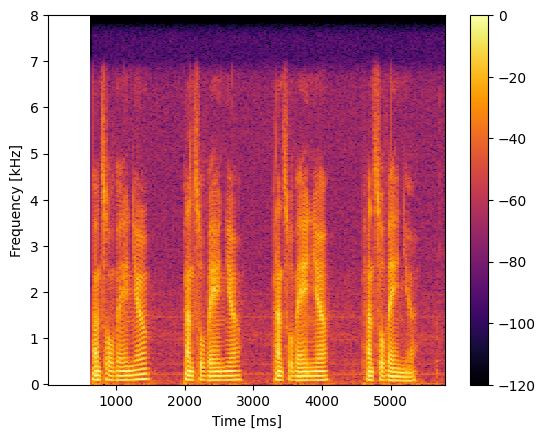

In [3]:
psudsr.demo_wav(test_pre)

#### Dysarthric example

In [4]:
test_post = "test_audio/self_post.wav"
IPython.display.Audio(test_post)

#### Another dysarthric example

In [5]:
exag_post = "test_audio/exagself_post.wav"
IPython.display.Audio(exag_post)

fs 16000
x.shape (118240,)
f.shape (513,)
t.shape (229,)
Sxx.shape (513, 229)


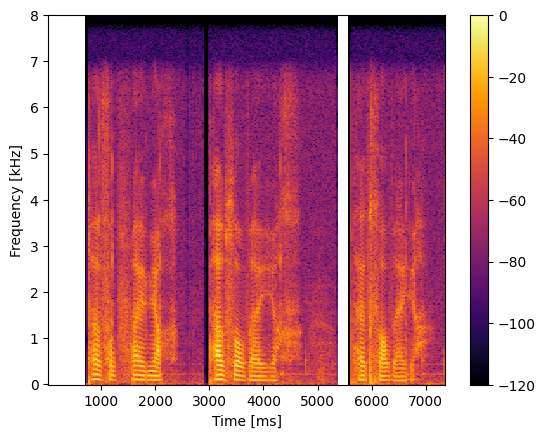

In [6]:
psudsr.demo_wav(exag_post)

### Preprocess audio

#### Reduce noise in audio files

In [7]:
# Unaltered recordings
home_dir = "test_audio/"
# Target directory of noise-reduced recordings
NR_dir = "test_audio/NR/"
# Apply reduce_noise function on audio recordings
psudsr.denoise(home_dir, NR_dir)

#### Visualize denoised spectrograms

fs 16000
x.shape (93120,)
f.shape (513,)
t.shape (180,)
Sxx.shape (513, 180)


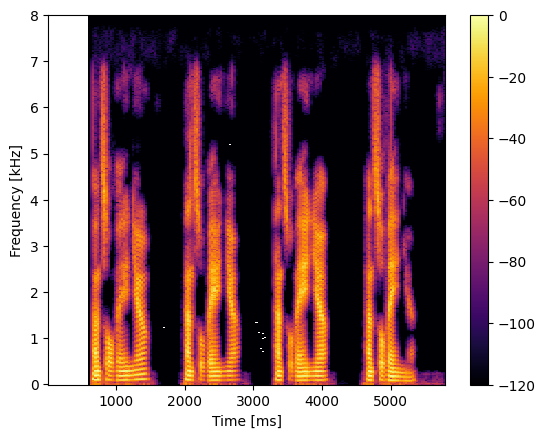

In [9]:
psudsr.demo_wav("test_audio/NR/self_pre_nr.wav")

fs 16000
x.shape (157920,)
f.shape (513,)
t.shape (306,)
Sxx.shape (513, 306)


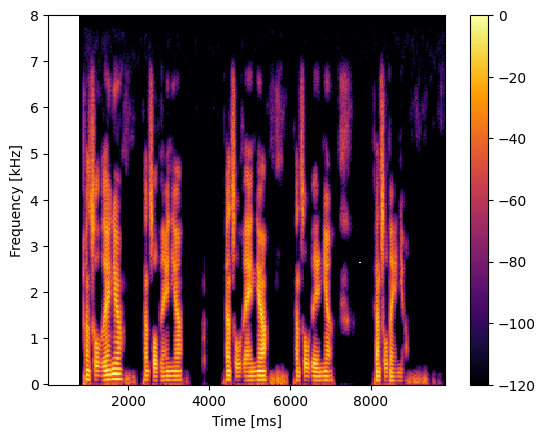

In [10]:
psudsr.demo_wav("test_audio/NR/self_post_nr.wav")

fs 16000
x.shape (118240,)
f.shape (513,)
t.shape (229,)
Sxx.shape (513, 229)


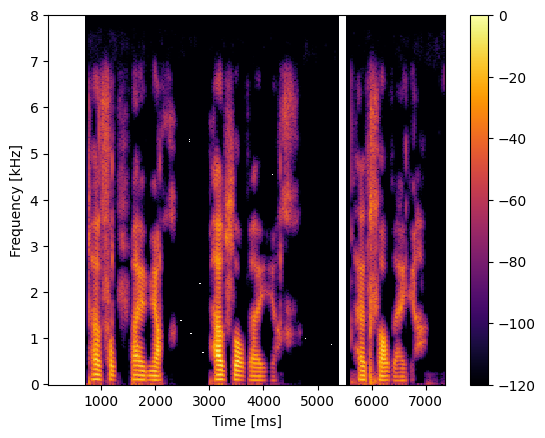

In [12]:
psudsr.demo_wav("test_audio/NR/exagself_post_nr.wav")

#### Segment audio files

In [13]:
# Acquire list of audio files
audio_files = [f for f in os.listdir('test_audio/NR') if f.endswith('_nr.wav')]
print(audio_files)

['self_pre_nr.wav', 'exagself_post_nr.wav', 'self_post_nr.wav']


In [14]:
# Location of files to be segmented
startdir = 'test_audio/NR/'
# Location where segmented files will be created
segmentf = 'test_audio/NR/segmented/'
# Keyword for vosk English ASR model to search for
keyword = "pennsylvania"
# Run segmentation procedure
psudsr.file_segment(keyword, audio_files, startdir, segmentf)

LOG (VoskAPI:ReadDataFiles():model.cc:213) Decoding params beam=10 max-active=3000 lattice-beam=2
LOG (VoskAPI:ReadDataFiles():model.cc:216) Silence phones 1:2:3:4:5:6:7:8:9:10
LOG (VoskAPI:RemoveOrphanNodes():nnet-nnet.cc:948) Removed 0 orphan nodes.
LOG (VoskAPI:RemoveOrphanComponents():nnet-nnet.cc:847) Removing 0 orphan components.
LOG (VoskAPI:ReadDataFiles():model.cc:248) Loading i-vector extractor from /home/patrick/.cache/vosk/vosk-model-small-en-us-0.15/ivector/final.ie
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:183) Computing derived variables for iVector extractor
LOG (VoskAPI:ComputeDerivedVars():ivector-extractor.cc:204) Done.
LOG (VoskAPI:ReadDataFiles():model.cc:282) Loading HCL and G from /home/patrick/.cache/vosk/vosk-model-small-en-us-0.15/graph/HCLr.fst /home/patrick/.cache/vosk/vosk-model-small-en-us-0.15/graph/Gr.fst
LOG (VoskAPI:ReadDataFiles():model.cc:308) Loading winfo /home/patrick/.cache/vosk/vosk-model-small-en-us-0.15/graph/phones/word_boundary.

self_pre_nr.wav converted to mono PCM format successfully.
[{'result': [{'conf': 1.0, 'end': 1.5, 'start': 0.66, 'word': 'pennsylvania'}, {'conf': 1.0, 'end': 2.85, 'start': 1.98, 'word': 'pennsylvania'}, {'conf': 1.0, 'end': 4.14, 'start': 3.27, 'word': 'pennsylvania'}, {'conf': 1.0, 'end': 5.4, 'start': 4.62, 'word': 'pennsylvania'}], 'text': 'pennsylvania pennsylvania pennsylvania pennsylvania'}]
4 utterance(s) of keyword 'pennsylvania' segmented from self_pre_nr.wav.
exagself_post_nr.wav converted to mono PCM format successfully.
[{'result': [{'conf': 1.0, 'end': 4.29, 'start': 3.03, 'word': 'pennsylvania'}], 'text': 'pennsylvania'}, {'result': [{'conf': 1.0, 'end': 6.78, 'start': 5.7, 'word': 'pennsylvania'}], 'text': 'pennsylvania'}]
2 utterance(s) of keyword 'pennsylvania' segmented from exagself_post_nr.wav.
self_post_nr.wav converted to mono PCM format successfully.
[{'result': [{'conf': 1.0, 'end': 1.86, 'start': 0.93, 'word': 'pennsylvania'}], 'text': 'pennsylvania'}, {'resu

/home/patrick/ssr/psudsr.py:128: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], ignore_index=True)


fs 16000
x.shape (13440,)
f.shape (513,)
t.shape (25,)
Sxx.shape (513, 25)


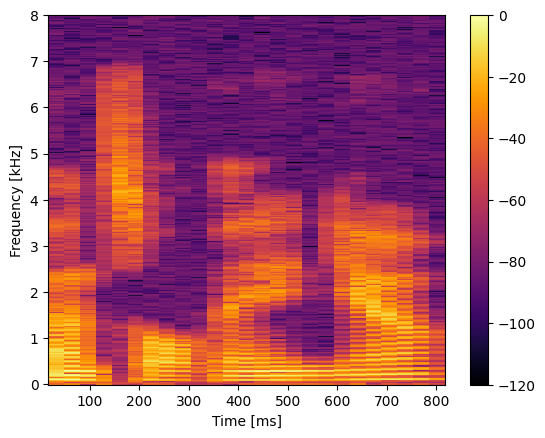

In [15]:
# Show a segmented example
test_sample = "test_audio/NR/segmented/self_pre_nr_1.wav"
psudsr.demo_wav(test_sample)

fs 16000
x.shape (17280,)
f.shape (513,)
t.shape (32,)
Sxx.shape (513, 32)


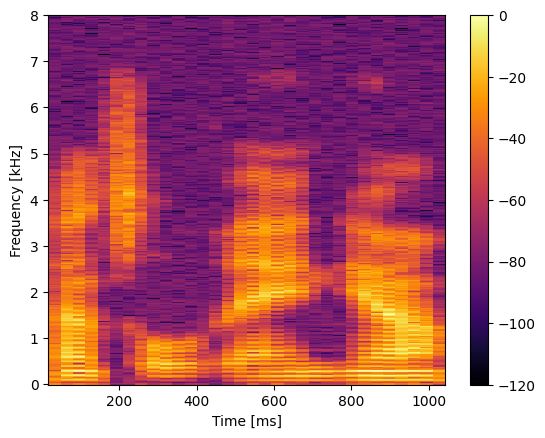

In [16]:
# Show another segmented example
test_sample = "test_audio/NR/segmented/self_post_nr_3.wav"
psudsr.demo_wav(test_sample)

fs 16000
x.shape (17280,)
f.shape (513,)
t.shape (32,)
Sxx.shape (513, 32)


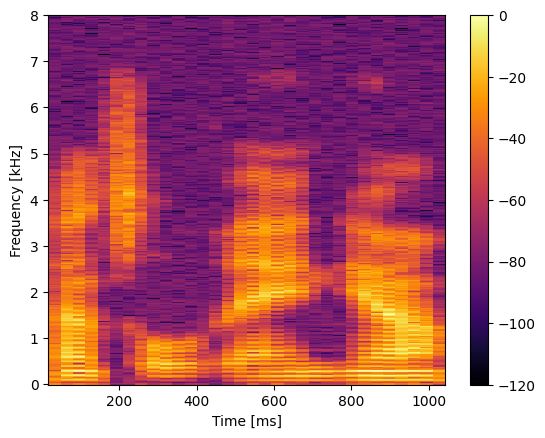

In [17]:
# Show another segmented example
exag_sample = "test_audio/NR/segmented/exagself_post_nr_1.wav"
psudsr.demo_wav(test_sample)

### Load trained model

In [18]:
model = jit.load('models/ResNet18_PSUH_binary.pt')

### Evaluate model on audio files

Output tensor represents the predicted probabilities for [0, 1] classes.

#### Healthy examples (class 0)

In [19]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_pre_nr_1.wav")

Original spectrogram shape: torch.Size([1, 201, 68])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.0115, 0.9885]])

In [20]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_pre_nr_2.wav")

Original spectrogram shape: torch.Size([1, 201, 70])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.8226, 0.1774]])

In [21]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_pre_nr_3.wav")

Original spectrogram shape: torch.Size([1, 201, 70])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.7903, 0.2097]])

In [22]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_pre_nr_4.wav")

Original spectrogram shape: torch.Size([1, 201, 63])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.9967, 0.0033]])

#### Dysarthric examples (class 1)

In [23]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_post_nr_1.wav")

Original spectrogram shape: torch.Size([1, 201, 75])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.7084, 0.2916]])

In [24]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_post_nr_2.wav")

Original spectrogram shape: torch.Size([1, 201, 77])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.9931, 0.0069]])

In [25]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_post_nr_3.wav")

Original spectrogram shape: torch.Size([1, 201, 87])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.9751, 0.0249]])

In [26]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_post_nr_4.wav")

Original spectrogram shape: torch.Size([1, 201, 80])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.9824, 0.0176]])

In [27]:
psudsr.inference_wav(model, "test_audio/NR/segmented/self_post_nr_5.wav")

Original spectrogram shape: torch.Size([1, 201, 68])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.9254, 0.0746]])

#### Exaggerated speech examples (class 1)

In [28]:
psudsr.inference_wav(model, "test_audio/NR/segmented/exagself_post_nr_1.wav")

Original spectrogram shape: torch.Size([1, 201, 101])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.2654, 0.7346]])

In [29]:
psudsr.inference_wav(model, "test_audio/NR/segmented/exagself_post_nr_2.wav")

Original spectrogram shape: torch.Size([1, 201, 87])
Reshaped spectrogram shape: torch.Size([1, 1, 201, 64])


tensor([[0.2957, 0.7043]])